In [2]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda')
model1 = SentenceTransformer('all-mpnet-base-v2', device='cuda')
model2 = SentenceTransformer("all-mpnet-base-v2")


In [5]:
sentence_embeddings1 = model1.encode('This is an example')
sentence_embeddings2 = model1.encode('this is an example')

In [6]:
from sklearn.decomposition import PCA
from sklearn.metrics import DistanceMetric

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [7]:
pca = PCA(n_components=2).fit(df['embeddings'].to_list())
print(pca.explained_variance_ratio_)

[0.09002535 0.05805069]


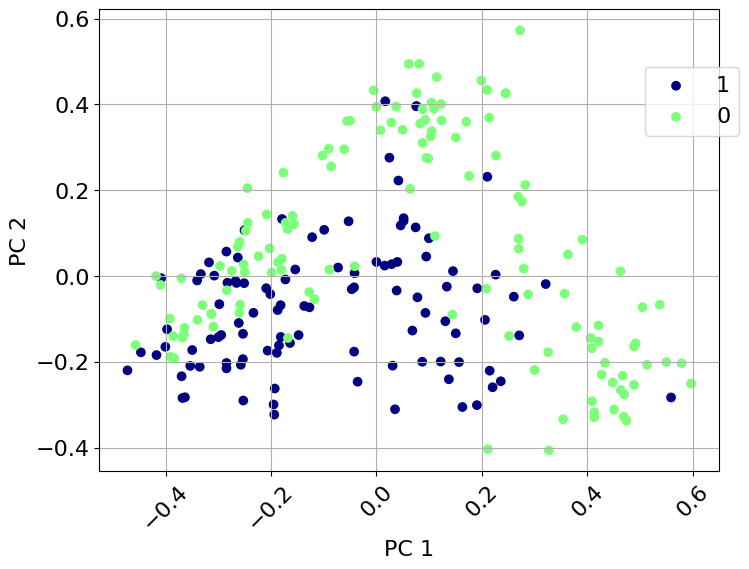

In [8]:
# plot data along PCA components
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 16})
plt.grid()

c=0
cmap = mpl.colormaps['jet']
for role in df['labels'].unique():
    idx = np.where(df['labels']==role)
    plt.scatter(pca.transform(df['embeddings'].to_list())[idx,0], pca.transform(df['embeddings'].to_list())[idx,1], c=[cmap(c)]*len(idx[0]), label=role)
    c = c + 1/len(df['labels'].unique())
    
plt.legend(bbox_to_anchor=(1.05, 0.9))
plt.xticks(rotation = 45)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

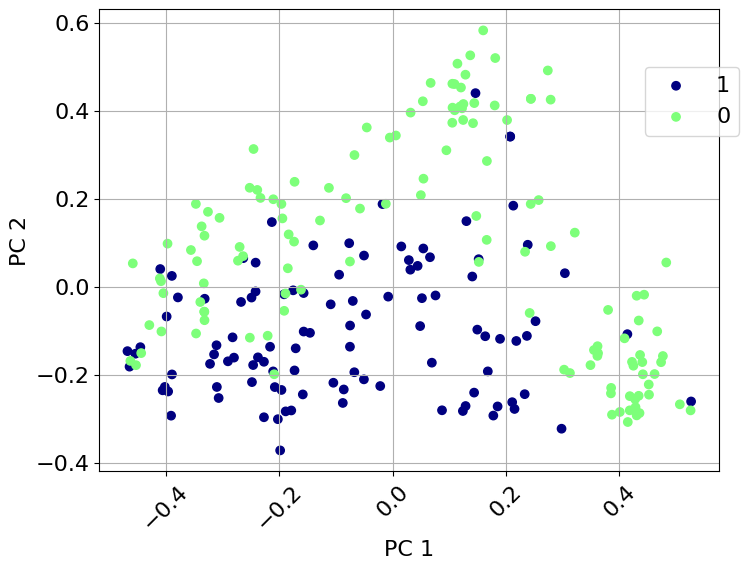

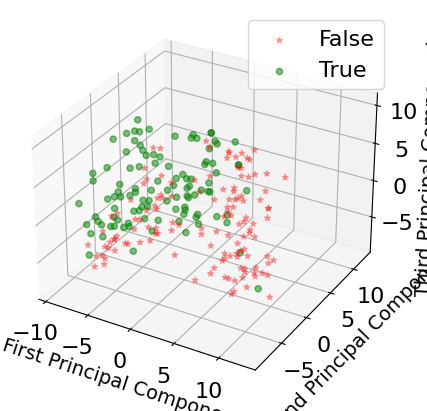

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
# from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
# from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# %matplotlib notebook


X = df['embeddings'].to_list()
y = df['labels']
sc = StandardScaler()

scaler = StandardScaler()
scaler.fit(X) 
X_scaled = scaler.transform(X)

pca = PCA(n_components=3)
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {0:'red',1:'green'}
labl = {0:'False',1:'True'}
marker = {0:'*',1:'o'}
alpha = {0:.3, 1:.5}

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

In [8]:
sentences = [
    "This framework generates embeddings for each input sentence",
    "Sentences are passed as a list of strings.",
    "The quick brown fox jumps over the lazy dog.",
]

# Sentences are encoded by calling model.encode()
embeddings = model1.encode(sentences)



In [9]:
# Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [ 6.41698437e-03  7.04134861e-03 -2.81442087e-02  5.12470566e-02
 -8.93959124e-03  2.12669298e-02  2.30779201e-02 -1.44860335e-02
 -5.55316452e-03 -2.49297172e-02  4.53493781e-02  2.48958785e-02
 -3.07579115e-02  5.66224232e-02  6.32021800e-02 -5.62528111e-02
  5.16509898e-02  5.78278536e-03 -2.62116212e-02  1.31876220e-03
  1.99272335e-02 -1.30593684e-03 -2.28710007e-03  4.72541675e-02
 -3.72494906e-02 -2.85245236e-02 -4.10241000e-02 -1.57975890e-02
  3.17329704e-03 -8.74174351e-04 -2.96459924e-02  3.21501382e-02
  3.51344272e-02  1.09737935e-02  9.16707108e-07 -1.18585548e-03
 -2.53640767e-02 -7.92880170e-03 -5.09485696e-03  7.40651088e-03
  2.80068722e-02  1.06995376e-02  1.07513517e-02  2.76827533e-02
 -5.19132540e-02 -4.98179533e-02  5.34074865e-02  5.79066873e-02
  7.86073580e-02  7.73014277e-02 -1.01111932e-02 -6.35446087e-02
 -1.71579942e-02 -6.77372562e-03 -2.45816750e-03  2.61346046e-02
 -5.38509

In [3]:
import pandas as pd

# Specify the path to your Excel file
excel_file_path = 'summary1.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)


In [4]:
df['embeddings'] = df['summary'].apply(model.encode)

In [47]:
X = df['embeddings'].to_list()
y = df['labels'].to_list()

In [48]:
df.count()

summary       234
labels        234
embeddings    234
pca_one       234
pca_two       234
tsne_one      234
tsne_two      234
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [16]:
LR.fit(X_train, y_train)

LogisticRegression()

In [17]:
from sklearn import metrics
pred = LR.predict(X_test)
print("Accu: ", metrics.accuracy_score(y_test, pred))
print("Prec: ", metrics.precision_score(y_test, pred))
print("Recl: ", metrics.recall_score(y_test, pred))

Accu:  0.8723404255319149
Prec:  0.85
Recl:  0.85


In [22]:
sum(y_test!=pred)
len(X_test)

47

In [23]:
excel_file = 'data_before_my edit.xlsx'
df.to_excel(excel_file, index=False)

In [28]:
for t in df['summary']:
    if model.encode(t) in X_test:
        print(t)

AttributeError: 'list' object has no attribute 'to_list'

In [33]:
for emb in X_test:
    for i in range(df['embeddings']):
        # if emb==df['embeddings'][i]:
        print(emb)
        print('--------------------------------')
        print(df['embeddings'].to_list()[i])

TypeError: 'Series' object cannot be interpreted as an integer

In [25]:
X_test

[array([ 1.66519266e-02,  5.27375098e-03, -7.09587783e-02, -4.93019298e-02,
         6.51391968e-03, -1.93667803e-02,  1.15640379e-01, -1.04634739e-01,
        -4.16931231e-03,  3.09318546e-02, -4.01365645e-02,  7.89536815e-03,
         6.26827870e-03, -5.14701195e-02, -9.09765065e-02,  1.58975404e-02,
        -2.73690354e-02,  2.09877584e-02,  8.62870142e-02,  1.35198589e-02,
        -5.11632375e-02, -1.56135723e-01, -3.25617008e-02, -2.50720568e-02,
         3.53544205e-02,  1.63787976e-03, -2.42379308e-02,  2.82082893e-02,
        -1.78825930e-02, -8.80957693e-02, -2.30416916e-02,  3.18692885e-02,
        -5.44254929e-02, -3.74932121e-03,  5.14889322e-02, -5.24631217e-02,
         7.73722725e-03, -9.51737072e-03,  1.68939866e-02, -8.60166457e-03,
         6.43847063e-02,  3.12577875e-04, -3.96525823e-02,  8.69638771e-02,
        -6.74613267e-02,  7.81656522e-03,  2.06942447e-02,  5.69864027e-02,
         6.87907934e-02, -3.39911617e-02, -6.71433806e-02, -1.82779748e-02,
         4.4

In [52]:
print(len(df))

234


In [59]:
print(y_test)

69     1
206    0
180    1
9      1
127    1
109    0
196    0
93     0
213    1
15     1
224    0
55     1
227    0
30     0
201    0
147    1
19     0
112    0
225    0
24     0
208    1
10     1
95     0
144    0
220    1
25     0
86     0
183    0
84     0
18     0
146    0
66     0
45     0
139    1
125    0
170    0
164    1
16     1
156    0
177    1
161    0
203    1
124    1
60     1
199    1
229    1
82     0
Name: labels, dtype: int64


In [46]:
yy_test = [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

In [47]:
print(len(yy_test))

47


In [49]:
lis1 = []
for i in range(len(yy_test)):
    if yy_test[i] != pred[i]:
        print(i)

4
5
12
29
39
42


In [64]:
print(len(df))

234


In [73]:
# for i in [4, 5, 12, 29, 39, 42]:
# 127, 109, 227, 
for i in [19, 109, 124, 127, 177, 227]:
    print(i, df['summary'][i])


19 FTC Expands Patent Listing Challenges, Targeting More Than 300 Junk Listings for Diabetes, Weight Loss, Asthma and COPD Drugs. 
Commission challenges junk patent listings for Ozempic, Victoza, Saxenda and other blockbuster prescription medications 
Today, the Federal Trade Commission expanded its campaign against pharmaceutical manufacturers’ improper or inaccurate listing of patents in the Food and Drug Administration’s (FDA) Orange Book, disputing junk patent listings for diabetes, weight loss, asthma, and COPD drugs, including Novo Nordisk Inc.’s blockbuster weight-loss drug, Ozempic.View Press Release
109 Former CIA Officer Pleads Guilty to Conspiracy to Commit Espionage. Alexander Yuk Ching Ma, 71, of Honolulu, a former Central Intelligence Agency (CIA) officer, pleaded guilty today to conspiring to gather and deliver national defense information to the People’s Republic of China (PRC).
124 Justice Department and Department of Labor Secure Agreements with Tech Company to Resolv

In [103]:

for i in [19, 109, 124, 127, 177, 227]:
    print(i+1, df['summary'][i+1])


20 FTC and FCC Sign Memorandum of Understanding on Continued Cooperation on Consumer Protection Issues. 
MOU follows FCC vote to restore net neutrality 
The Federal Trade Commission and the Federal Communications Commission (FCC) have signed a Memorandum of Understanding (MOU) reiterating the agencies’ ongoing cooperation on consumer protection matters in response to the FCC’s decision last week to View Press Release

110 California Man Arrested for Making Violent Threats Against North Carolinians. A Huntington Beach, California, man was arrested today on federal charges relating to sending threats to individuals and knowingly making false bomb threats. Kevin Dunlow, age 62, is charged in a complaint unsealed today in the U.S. District Court of the Eastern District of North Carolina following his arrest in California. He will have his initial appearance today, and his detention hearing will be set at a later date.
125 Justice Department Releases Webinar with Department of Education’s O

In [95]:
import random
xxx = []
yyy = []

random.seed(42)
for i in range(0, 234):
    xxx.append(i)
    yyy.append(random.randint(0, 1))

Xtr, Xte, ytr, yte = train_test_split(xxx, yyy, test_size=0.2, random_state=42)

In [96]:
print(Xte)

[69, 206, 180, 9, 127, 109, 196, 93, 213, 15, 224, 55, 227, 30, 201, 147, 19, 112, 225, 24, 208, 10, 95, 144, 220, 25, 86, 183, 84, 18, 146, 66, 45, 139, 125, 170, 164, 16, 156, 177, 161, 203, 124, 60, 199, 229, 82]


In [99]:
df['summary'][233]

'Scheme to Transfer Money to Iran Results in Guilty Pleas. Muzzamil Zaidi, 40, and Asim Mujtaba Naqvi, 40, both of Houston, Texas, pleaded guilty today for their roles in an illicit scheme to transfer tens of thousands of dollars from the United States to Iran, including for the benefit of Ayatollah Ali Husseini Khamenei, the Supreme Leader of the Islamic Republic of Iran.'

In [53]:
print(pred)

[1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1
 1 0 0 0 1 0 1 1 1 0]


y_test

4
5
12
29
39
42

69     1
206    0
180    1
9      1
127    1
109    0
196    0
93     0
213    1
15     1
224    0
55     1
227    0
30     0
201    0
147    1
19     0
112    0
225    0
24     0
208    1
10     1
95     0
144    0
220    1
25     0
86     0
183    0
84     0
18     0
146    0
66     0
45     0
139    1
125    0
170    0
164    1
16     1
156    0
177    1
161    0
203    1
124    1
60     1
199    1
229    1
82     0


In [34]:
for i in range(len(y_test)):
    if y_test[i] != pred[i]:
        print(X_test[i])

KeyError: 0

### ~55 Just My data, LR
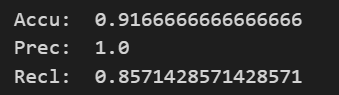

### Mine+shreya 105 records, LR
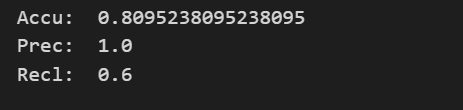

### 105, SVM
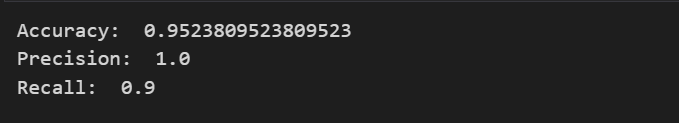

### 234, all data, LR
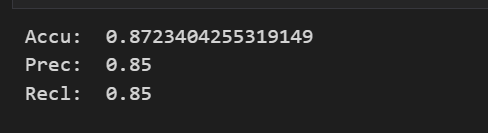

In [75]:
print(len(X[0]))

768


In [54]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [55]:
# Example DataFrame
# Assuming df['embeddings'] is a column of 384-dimensional embeddings
# Each cell in this column is a list or numpy array of length 384

# Example to create a DataFrame with random data
# df = pd.DataFrame({'embeddings': [np.random.rand(384) for _ in range(100)]})

# Extract the embeddings
embeddings = np.vstack(df['embeddings'].values)
# df['labels'] = yy


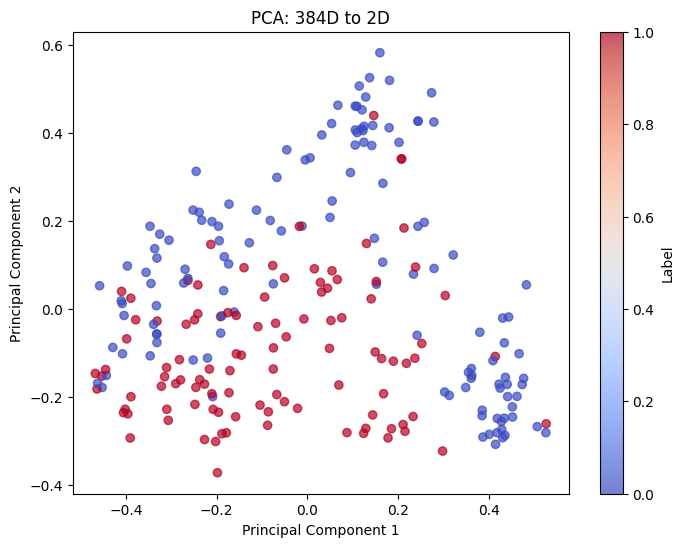

In [56]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# Add the PCA results to the DataFrame for easier plotting
df['pca_one'] = pca_result[:, 0]
df['pca_two'] = pca_result[:, 1]

# Plot PCA result with color coding
plt.figure(figsize=(8, 6))
plt.scatter(df['pca_one'], df['pca_two'], c=df['labels'], cmap='coolwarm', alpha=0.7)
plt.title('PCA: 384D to 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label')
plt.show()


In [13]:
df

,summary,labels,embeddings
0,SEC Charges Lordstown Motors with Misleading I...,1,"[0.00059659604, 0.0724231, -0.016618004, -0.05..."
1,SEC Investor Advisory Committee to Discuss Pro...,1,"[-0.050012413, -0.065215565, -0.053732704, 0.0..."
2,Federal Court Orders Unregistered Pool Operato...,1,"[-0.052740153, 0.006282463, 0.038588397, 0.013..."
3,Federal Court Orders California-Based Precious...,1,"[-0.052874956, 0.075043485, 0.06745287, 0.0277..."
4,CFTC Approves Final Rules on Swap Confirmation...,0,"[-0.08441608, -0.04903672, 0.052254114, -0.004..."
...,...,...,...
229,Sodinokibi/REvil Affiliate Sentenced for Role ...,1,"[0.004505334, 0.11985224, -0.07411051, -0.0271..."
230,Staffing Company to Pay $2.7M for Alleged Fail...,1,"[-0.11855251, -0.006193863, -0.000370973, 0.02..."
231,Readout of Justice Department’s Civil Rights D...,0,"[0.0284172, 0.11009854, -0.06776876, 0.0013469..."
232,Elara Caring Agrees to Pay $4.2 Million to Set...,1,"[-0.018735368, 0.019723594, 0.008989912, -0.02..."


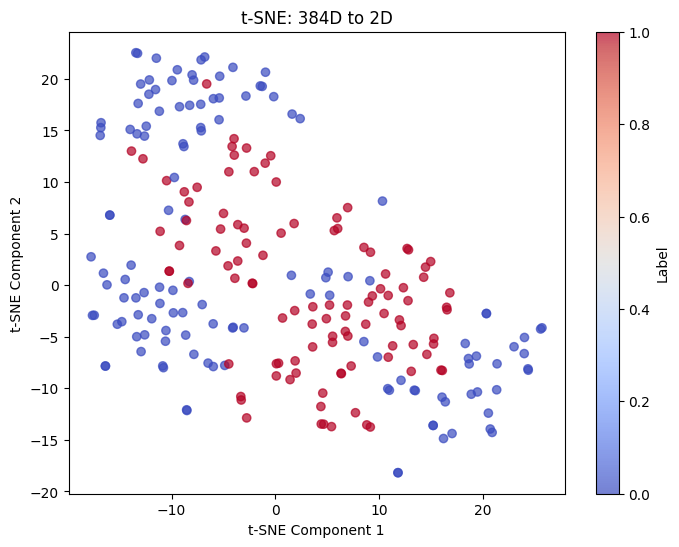

In [57]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(embeddings)

# Add the t-SNE results to the DataFrame for easier plotting
df['tsne_one'] = tsne_result[:, 0]
df['tsne_two'] = tsne_result[:, 1]

# Plot t-SNE result with color coding
plt.figure(figsize=(8, 6))
plt.scatter(df['tsne_one'], df['tsne_two'], c=df['labels'], cmap='coolwarm', alpha=0.7)
plt.title('t-SNE: 384D to 2D')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Label')
plt.show()


In [58]:
from sklearn.svm import SVC


In [12]:

from sklearn import metrics
svm_clf = SVC(kernel='linear')  # You can try other kernels like 'rbf', 'poly', etc.

# Train the classifier
svm_clf.fit(X_train, y_train)

# Predict on the test set
pred = svm_clf.predict(X_test)

# Print performance metrics
print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print("Precision: ", metrics.precision_score(y_test, pred))
print("Recall: ", metrics.recall_score(y_test, pred))

NameError: name 'SVC' is not defined

In [72]:

from sklearn import metrics
for gg in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8, 1]:
    svm_rbf = SVC(kernel='rbf', gamma=gg)  # You can try other kernels like 'rbf', 'poly', etc.

    # Train the classifier
    svm_rbf.fit(X_train, y_train)

    # Predict on the test set
    pred1 = svm_rbf.predict(X_test)

    # Print performance metrics
    print('gg: ' + str(gg))
    print("Accuracy: ", metrics.accuracy_score(y_test, pred1))
    print("Precision: ", metrics.precision_score(y_test, pred1))
    print("Recall: ", metrics.recall_score(y_test, pred1))

# 0.4 is the best gg for 'all-mpnet-base-v2' embedding

gg: 0.1
Accuracy:  0.8732394366197183
Precision:  0.84375
Recall:  0.8709677419354839
gg: 0.2
Accuracy:  0.8873239436619719
Precision:  0.8484848484848485
Recall:  0.9032258064516129
gg: 0.3
Accuracy:  0.8873239436619719
Precision:  0.8285714285714286
Recall:  0.9354838709677419
gg: 0.4
Accuracy:  0.8873239436619719
Precision:  0.8285714285714286
Recall:  0.9354838709677419
gg: 0.5
Accuracy:  0.8873239436619719
Precision:  0.8285714285714286
Recall:  0.9354838709677419
gg: 0.6
Accuracy:  0.8732394366197183
Precision:  0.8235294117647058
Recall:  0.9032258064516129
gg: 0.7
Accuracy:  0.8732394366197183
Precision:  0.8235294117647058
Recall:  0.9032258064516129
gg: 0.8
Accuracy:  0.8732394366197183
Precision:  0.8235294117647058
Recall:  0.9032258064516129
gg: 0.8
Accuracy:  0.8732394366197183
Precision:  0.8235294117647058
Recall:  0.9032258064516129
gg: 1
Accuracy:  0.8732394366197183
Precision:  0.8235294117647058
Recall:  0.9032258064516129


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Prepare data
X = df['embeddings'].to_list()
y = df['labels'].to_list()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for kk in range(2, 15):
    # Initialize the k-NN classifier with k=5 (you can experiment with different values of k)
    knn_clf = KNeighborsClassifier(n_neighbors=kk)

    # Train the classifier
    knn_clf.fit(X_train, y_train)

    # Predict on the test set
    pred = knn_clf.predict(X_test)

    # Print performance metrics
    print('kk', kk)
    print("Accuracy: ", metrics.accuracy_score(y_test, pred))
    print("Precision: ", metrics.precision_score(y_test, pred, average='weighted'))
    print("Recall: ", metrics.recall_score(y_test, pred, average='weighted'))
    print("F1 Score: ", metrics.f1_score(y_test, pred, average='weighted'))


kk 2
Accuracy:  0.7887323943661971
Precision:  0.7885218286462964
Recall:  0.7887323943661971
F1 Score:  0.7871792733119155
kk 3
Accuracy:  0.8450704225352113
Precision:  0.8459055615745757
Recall:  0.8450704225352113
F1 Score:  0.8453194554103806
kk 4
Accuracy:  0.8169014084507042
Precision:  0.8172172570305554
Recall:  0.8169014084507042
F1 Score:  0.8155553702036602
kk 5
Accuracy:  0.8873239436619719
Precision:  0.8893681065660309
Recall:  0.8873239436619719
F1 Score:  0.887639942217407
kk 6
Accuracy:  0.8450704225352113
Precision:  0.8447841520668729
Recall:  0.8450704225352113
F1 Score:  0.8447568633822772
kk 7
Accuracy:  0.8591549295774648
Precision:  0.8591549295774648
Recall:  0.8591549295774648
F1 Score:  0.8591549295774648
kk 8
Accuracy:  0.8450704225352113
Precision:  0.8447841520668729
Recall:  0.8450704225352113
F1 Score:  0.8447568633822772
kk 9
Accuracy:  0.8450704225352113
Precision:  0.8459055615745757
Recall:  0.8450704225352113
F1 Score:  0.8453194554103806
kk 10
Acc

In [62]:
82
85
87

87